TOPICS

Architecture of neural network regression model

Input an output shapes of neural network models

Creating custom data to view and fit

Steps in modelling

Different evaluation methods

Saving and loading models

---
Regression: it aims at establishing the relationship between two things ;what happens to a thing2 if the value of thing1 changes

linear regression for example uses the mathematical relationship y=mx + c to find the value of y for every instance of x

---

it involves input modeling to suit the desired outcome

The model is fed on different input & output features of problem until it learns to find patterns and relationship between inputs and outputs and thus will be useful in prediction

1.input layer shape= shape of the input

2. hidden layers  =problem specific

3. neurons per output =depends on the problem

4.output layer = shape of the expected output

Architecture of neural network



1.   Input layer shape
2.   Hidden layers
3.   Neurons per hidden layer
4.   Output layer shape
5.   Hidden activation
5.   Output activation
6.   Loss function
7.   Optimizer



Creating sample regression data

In [ ]:
#import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.19.0


creating data to view and fit

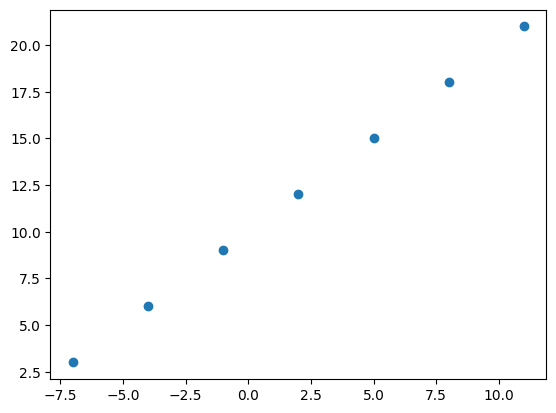

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0])

#create labels
Y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0])

#visualize it
plt.scatter(X,Y)

In [ ]:
#the realtionship is y=x+10
Y==X + 10

array([ True,  True,  True,  True,  True,  True,  True])

Input and output shapes

In [ ]:
#create a demo tensor for our housing price prediction problem
house_info =tf.constant(["bedroom","bathroom","garage"])
house_price =tf.constant([939700])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
#so lets try to find the input and output shape of X & Y

input_shape= X.shape
output_shape= Y.shape
input_shape,output_shape

((7,), (7,))

In [ ]:
#lets try to model the rlationship between the variables
X[0],Y[0]

(np.float64(-7.0), np.float64(3.0))

In [ ]:
X[1],Y[1]

(np.float64(-4.0), np.float64(6.0))

The relationship cannot be seen clearly

In [ ]:
#we dealing with a tensor without shape/scalar??
input_shape= X[0].shape
output_shape= Y[0].shape
input_shape,output_shape

((), ())

**The Core Problem:**

Data Shape
Keras expects the input features (x) to have the shape (number_of_samples, number_of_features).

Your Current Shape (ndim=1): The current shape of your x is likely (number_of_samples,), which is a 1-dimensional array or list (like [1, 2, 3, 4, 5]).

The Expected Shape (ndim=2): Keras needs it to be (number_of_samples, 1) for a single feature model (like [[1], [2], [3], [4], [5]]).

In [ ]:
print('this is X',X)
print('this is Y',Y)

this is X [-7. -4. -1.  2.  5.  8. 11.]
this is Y [ 3.  6.  9. 12. 15. 18. 21.]


In [ ]:
#reshape the numpy array soln
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)
X,Y

(array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.]]),
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.]]))

Turn the array into tensors

In [ ]:
y= tf.constant(Y)
x= tf.constant(X)
x,y

(<tf.Tensor: shape=(7, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.]])>,
 <tf.Tensor: shape=(7, 1), dtype=float64, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.]])>)

In [ ]:
input_shape= x[0].shape
output_shape= y[0].shape
input_shape,output_shape

(TensorShape([1]), TensorShape([1]))

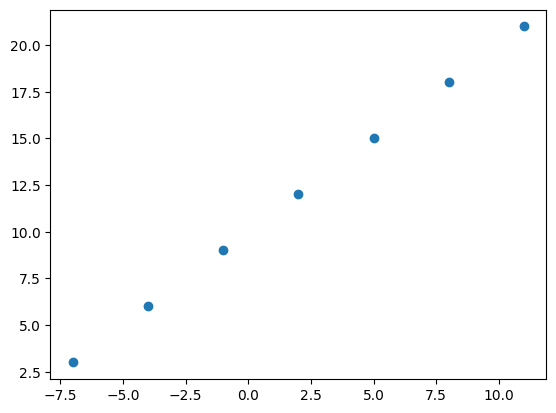

In [ ]:
plt.scatter(x,y)

##Steps in modelling with tensorflow

1. **Creating a mode**l -define the input & output layers,the hidden layers of a deep learning model

2. **Compiling a model**-*define the loss function*(the function that tells our model how wrong it is )the *optimizer*(tells our model how to improve its patterns of learning ),*evaluation metrics* (what we can use to evaluate the performance of our model )
3. **Fitting a model** -letting a model try to find patterns between x & y (features and labels)

In [ ]:
#set random seed
tf.random.set_seed(42)

#1.create model using Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model.compile(loss =tf.keras.losses.mae,#Mean Absolute Error (MAE) is defined as the average sum of the absolute differences between the actual value and the predicted value, serving as a straightforward measure of model accuracy that is less sensitive to outliers
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
#model.fit(x_train_subset,y_train_subset)
model.fit(x,y,epochs=5 #Number chance
          )



Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 17.6120 - mae: 17.6120
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 17.3457 - mae: 17.3457
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 17.0902 - mae: 17.0902
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 16.9251 - mae: 16.9251
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 16.7600 - mae: 16.7600


tf.keras.Sequential is a class in TensorFlow's Keras API used to build neural network models by stacking layers in a linear, step-by-step fashion. It is particularly well-suited for straightforward feedforward neural networks where each layer has exactly one input tensor and one output tensor.

In [ ]:
#checkout x & y
x,y

(<tf.Tensor: shape=(7, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.]])>,
 <tf.Tensor: shape=(7, 1), dtype=float64, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.]])>)

In [ ]:
#try and make a prediction using our model
#model.predict(14.0)-wrong format
model.predict(np.array([[14.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


array([[-19.1271]], dtype=float32)

##Improving our models
We can achieve that by altering the steps we took to create the model

1. **Creating a model ** -here we might add more layers ,increase the number of neurons within each hidden layers,change the activation function of each layer

2. **Compiling a model ** -
here we might change the optimization function ,or the **leaning rate ** of the optimization function

3. **Fitting a model ** -
here we might increase epochs ,leave it training for longer  or on more data (provide it more data for training )

---


**Changing the eposhs hyperparameter**

In [ ]:
#let's rebuild our model

#1. create the model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer =tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

#3. Fitting a model
model.fit(x,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - loss: 14.9186 - mae: 14.9186
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.7534 - mae: 14.7534
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 14.5883 - mae: 14.5883
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 14.4232 - mae: 14.4232
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 14.2581 - mae: 14.2581
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 14.0930 - mae: 14.0930
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 13.9279 - mae: 13.9279
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 13.7628 - mae: 13.7628
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 13.5977 - mae: 13.5977
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 13.4326 - mae: 13.4326
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 13.2675 - mae: 13.2675
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 13.1024 - mae: 13.1024
Epoch 13/100
1/1 ━━━━━━━

In [ ]:
#lets remind ourselves of the training data
x,y

(<tf.Tensor: shape=(7, 1), dtype=float64, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.]])>,
 <tf.Tensor: shape=(7, 1), dtype=float64, numpy=
 array([[ 3.],
        [ 6.],
        [ 9.],
        [12.],
        [15.],
        [18.],
        [21.]])>)

In [ ]:
#Let's see if our models prediction has improved
model.predict(np.array([[14.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


array([[19.665068]], dtype=float32)

**Increasing the layes & neurons within each**

In [ ]:
#Let's rebuild our model again and this time increase the number of layers&neurons inside each
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)]
)

#2. Compling a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fitting our  model
model.fit(x,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.8255 - mae: 11.8255
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 11.6011 - mae: 11.6011
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 11.3670 - mae: 11.3670
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 11.1279 - mae: 11.1279
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 10.8774 - mae: 10.8774
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.6117 - mae: 10.6117
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 10.3260 - mae: 10.3260
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 10.0106 - mae: 10.0106
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.6495 - mae: 9.6495
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.2243 - mae: 9.2243
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.7204 - mae: 8.7204
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.1106 - mae: 8.1106
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━

In [ ]:
#Let's see what it predicts now --this is verbose but optimum
value_to_predict= 14.0
prediction_tensor= tf.constant([[value_to_predict]])
model.predict(prediction_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


array([[27.241537]], dtype=float32)

In [ ]:
#cleaner test bcoz passing python object ie array instead of tensors slows down the model
model.predict(tf.constant([[14.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[27.241537]], dtype=float32)

**Changing the optimizer**

In [ ]:
#Let's rebuild our model again and this time changing the optimizer
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)]
)

#2. Compling a model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

#3. Fitting our  model
model.fit(x,y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 11.7188 - mae: 11.7188
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.6821 - mae: 9.6821
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.6261 - mae: 7.6261
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 4.5339 - mae: 4.5339
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 5.2191 - mae: 5.2191
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 6.0906 - mae: 6.0906
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 5.2113 - mae: 5.2113
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 4.0743 - mae: 4.0743
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.8291 - mae: 3.8291
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 4.5590 - mae: 4.5590
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 4.8053 - mae: 4.8053
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 4.3685 - mae: 4.3685
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/ste

In [ ]:
#Let's see what this hybrid hyperparameter changes predict
value_to_predict=14.0
prediction_tensor=tf.constant([[value_to_predict]])
model.predict(prediction_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


array([[22.939241]], dtype=float32)

##**Learning rate is the most important neural network hyperparameter**

##How do we evaluate a model ??
**A typical workflow of building neural netwoks involves**

```
Build a model ->fit it -> evaluate it ->tweak it ->fit it ->evaluate it ...
```
when it comes to evaluation we its good Idea to visualize:

* The data-what are working with?What does it look like ?

* The model itself-What does our model look like ?

* The training of our model -How does our model perform when it learns ?

* The predictions of our models -How does the predictions of our model line up against the ground truth(the original labels)

In [ ]:
#Let's try to make a bigger dataset
X=tf.range(-100,100,4)
X

In [ ]:
#Make the labels for the dataset
Y=X+10
Y

In [ ]:
#Visualize the data
import matplotlib.pyplot as plt
#plt.plot(X,Y)
plt.scatter(X,Y)

##The 3 sets

 * **Training set**-The model learns from this data,typically 70-80% of the total data  *course material*
 * **Validation set**-the model gets tuned on this data ,typically 10-15% of the available data *past papers*
 * **Test set**-the model gets evaluated on this data to test what it has learned,typically 10-15% of the available data  *final exam*

In [ ]:
#Check the length of how many samples we have
len(X)

7

In [ ]:
#Split dtat into train and test sets
X_train=X[:40]#first 40 are the training samples (80% of the data )
Y_train = Y[:40]

X_test=X[40:]#last 10 are testing samples (20% of the data )
Y_test =Y[40:]

len(X_train),len(X_test),len(Y_train),len(Y_test)

(7, 0, 7, 0)

##Visualizing the data
Now we've got our training & test data sets ..lets visualize them

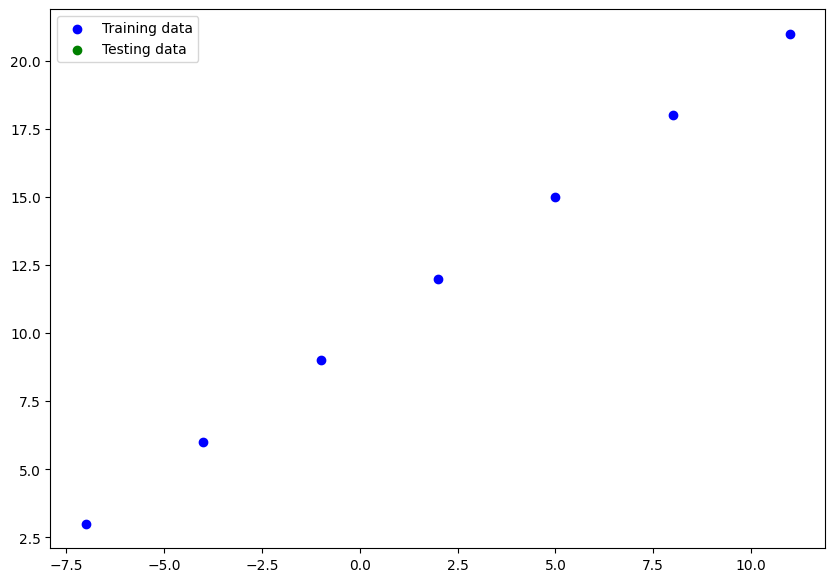

In [ ]:
plt.figure(figsize=(10,7))
#plot training data in blue
plt.scatter(X_train,Y_train,c="b",label="Training data")
#plpt test data
plt.scatter(X_test,Y_test,c="g",label="Testing data")
#Show a legend
plt.legend()

In [ ]:
X.shape,Y.shape,X[0],Y[0]

((7, 1), (7, 1), array([-7.]), array([3.]))

In [ ]:
#Let's build our model
tf.random.set_seed(42)
#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="model_1")

#2. Compile  the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(X_train,Y_train,epochs=100)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step - loss: 13.1584 - mae: 13.1584
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 12.6959 - mae: 12.6959
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 12.5246 - mae: 12.5246
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 12.3545 - mae: 12.3545
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 12.1854 - mae: 12.1854
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 12.0169 - mae: 12.0169
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 11.8487 - mae: 11.8487
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 11.6804 - mae: 11.6804
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 11.5118 - mae: 11.5118
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.3426 - mae: 11.3426
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.1723 - mae: 11.1723
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.0008 - mae: 11.0008
Epoch 13/100
1/1 ━━━━━━━

In [ ]:
model.summary()

* Total params-total No of parameters in the model
* Trainable params-the parameters/patterns the model can update as it trains
* Non-trainable params-these parameters aren't updated during training (typical when you bring in already learn't patterns/parameters from other models via **Transfer Learning**)

---
MIT intro to deep Learning video

In [ ]:
#3. Fit the model
model.fit(X_train,Y_train,epochs=100,verbose=0)

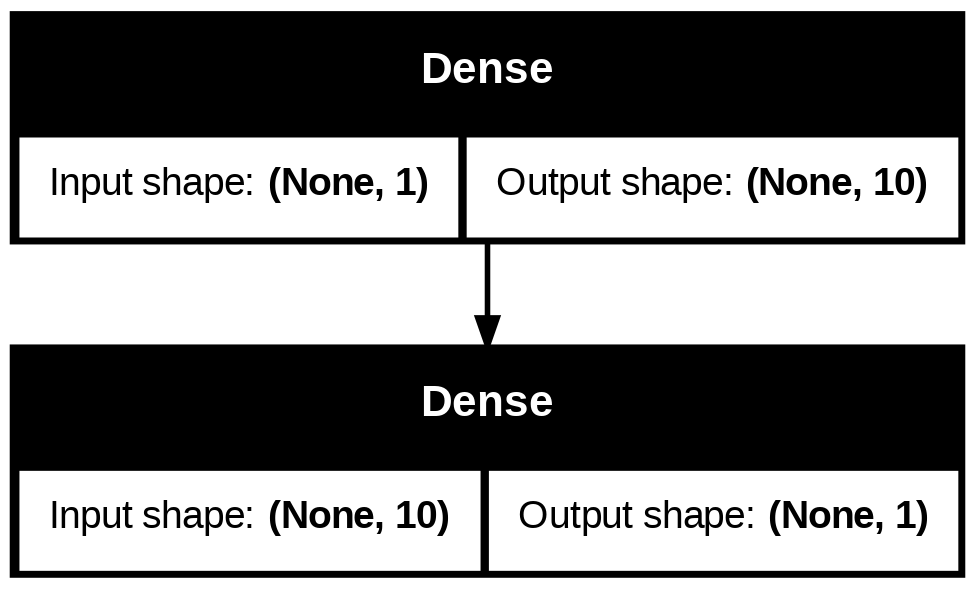

In [ ]:

from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

##Visualize our predictions

To visualize the predictions ,it's a good idea to plot them against the ground labels

Often you'll see this in form of y_test or y_true vs y_pred(pround truths vs models prediction )

In [ ]:
#make some predictions
y_pred=model.predict(X_test)
y_pred


ValueError: math domain error

In [ ]:
Y_test

array([], shape=(0, 1), dtype=float64)

In [ ]:
#Let's create a plotting function
def plot_predictions(
    train_data=X_train,
    train_labels=Y_train,
    test_data=X_test,
    test_labels=Y_test,
    predictions=y_pred
):
  """
  plots training data,test data and compare predictions to ground truth labels

  """
  plt.figure(figsize=(10,7)),
  #plot training data in blue
  plt.scatter(train_data,train_labels,c="blue",label="Training data") ,
  #plpt test data
  plt.scatter(X_test,Y_test,c="g",label="Testing data")
  #Plot model's predictions in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  #Show a legend
  plt.legend()

NameError: name 'y_pred' is not defined

In [ ]:
plot_predictions()

##Evaluating our models prediction with regression evaluation metrics

Depending on the problem you're working on ,there will be different evaluation metrics to evaluate your models performance

the two main metrics in regression are
* MAE
* MSE

In [ ]:
##Evaluating our models on the test
model.evaluate(X_test,Y_test)

In [ ]:
#calculate the MAE
tf.keras.losses.MAE(X_test,Y_test)

Yes, the function **tf.keras.metrics.mean_absolute_error()** exists, but recent versions of TensorFlow have deprecated it in favor of shorter aliases like *tf.keras.metrics.mae()*. You can also use the functional form *tf.keras.metrics.mae(y_true, y_pred)*.

In [ ]:
#Check this out MAE calculations
#We squeezed a tensor
mae =tf.keras.metrics.mae(y_true=Y_test,
                                  y_pred=tf.squeeze(y_pred))
mae

In [ ]:
#Calculating the MSE
mse=tf.keras.metrics.mse(y_true=Y_test,
                         y_pred=y_pred)
mse

In [ ]:
tf.constant(y_pred),tf.squeeze(y_pred)

In [ ]:
mse=tf.keras.metrics.mse(y_true=Y_test,
                         y_pred=tf.squeeze(y_pred))
mse

In [ ]:
#Make some functions to reuse the MAE & MSE
def mae(y_true,y_pred):
  return tf.keras.metrics.mae(y_true,y_pred)

def mse(y_true,y_pred):
  return tf.keras.metrics.mse(y_true,y_pred)

##How do we get the error values lower(improve our models prediction accuracy)

1. Get more data
2. Make the model larger (more complex model)
3. Train for longer

Let's do some tweaking and see

1. `model_1` -1 layer ,trained for 100 epochs
2. `model_2`-2 layers,trained for 100 epochs
3. `model_3`-2 layers,trained for 500 epochs
4. `model_4` .3 layers ,trained for 120 epochs

`model_1`

In [ ]:
#set random seed
tf.random.set_seed(42)

#create a model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#fit the model
#the training data is being rejected by the layer ,strange
X_train_reshaped=tf.expand_dims(X_train,1)#fix
Y_train_reshaped=tf.expand_dims(Y_train,1)

model_1.fit(X_train_reshaped,Y_train_reshaped,epochs=100)

In [ ]:
#Make and plot predictions for Model_1
y_pred_1=model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
#Calculate model_1 evaluation metrics
mae_1=mae(y_true=Y_test,y_pred=y_pred_1)
mse_1=mse(y_true=Y_test,y_pred=y_pred_1)
mae_1,mse_1

`model_2`

In [ ]:
#set random seed
tf.random.set_seed(42)

#create a model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#fit the model
#the training data is being rejected by the layer ,strange
X_train_reshaped=tf.expand_dims(X_train,1)#fix
Y_train_reshaped=tf.expand_dims(Y_train,1)

model_2.fit(X_train_reshaped,Y_train_reshaped,epochs=100)

In [ ]:
#Make and plot predictions for `model_2
y_pred_2=model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

Not as expected I'd say

In [ ]:
#Evaluate our models errors
mae_2=mae(y_true=Y_test,y_pred=y_pred_2)
mse_2=mse(y_true=Y_test,y_pred=y_pred_2)
mae_2,mse_2

`model_3`

In [ ]:
#set random seed
tf.random.set_seed(42)

#create a model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#fit the model
#the training data is being rejected by the layer ,strange
X_train_reshaped=tf.expand_dims(X_train,1)#fix
Y_train_reshaped=tf.expand_dims(Y_train,1)

model_3.fit(X_train_reshaped,Y_train_reshaped,epochs=500)

##It so happens that colab failed to save all our instancs and now it looks like we have to redo the work to proceed .Nkt !!!
---
That's why we may be struggling to save the models



In [ ]:
model_1.summary(),model_2.summary(

)

In [ ]:
#saving our models
model_1.save("model_1.keras")

In [ ]:
#Loading and using saved tensorflow models
#You can decide to copy the filepath in full /remove the preceeding content stuff
loaded_SavedModel_format=tf.keras.models.load_model("model_1.keras")
loaded_SavedModel_format.summary()

In [ ]:
#compare  saved model with the model in the workspace
model_1.summary()

In [ ]:
#Lets compare their predictions
#Ascertain wether the loaded model & original model are alike-->same preds(0hehehe)
model_1_pred=model_1.predict(X_test)
loaded_SavedModel_format_pred=loaded_SavedModel_format.predict(X_test)

model_1_pred == loaded_SavedModel_format_pred

In [ ]:
#LOading the h5 model
loaded_h5_model=tf.keras.models.The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()# checking the architecture

In [ ]:
#check weight/pred symetry == both predictions are true /
loaded_h5_model_pred=loaded_h5_model.predict(X_test)
model_2_pred=model_2.predict(X_test)
loaded_h5_model_pred == model_2_pred

##How do we download a saved file /model to our machine

1. Mannually from the files tab
2. Use code
3. Save to google Drive

In [ ]:
#Download fils from google colab
from google.colab import files
files.download("/content/model_1.keras")

In [ ]:
#from google colab to google drive (requires mounting google drive )

##So now we want to create a larger model

In [ ]:
#import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt






In [ ]:
#Read in the insurance dataset
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


##Neural networks only know Numerical values : so we need to figure out what parts of our data isnt numerical and preprocess them b4 passing them into a neural network

In [ ]:
#Let's find the datatypes of the features


insurance["sex"],insurance["region"],insurance["sex"],insurance["age"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       southwest
 1       southeast
 2       southeast
 3       northwest
 4       northwest
           ...    
 1333    northwest
 1334    northeast
 1335    southeast
 1336    southwest
 1337    northwest
 Name: region, Length: 1338, dtype: object,
 0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

In [ ]:
#Let's try one hot encoding for our DataFrame

#Default dtype is boolean : specify the dtypewhen using the get_dummies()
insurance_one_hot=pd.get_dummies(insurance,dtype=int)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
insurance_one_hot['sex_female']


,sex_female
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,1
1335,1
1336,1


In [ ]:
#Let's inspect the Table a bit

insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#Let's ceate x and y variables
x=insurance_one_hot.drop("charges",axis=1)

x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
# View the y
y=insurance_one_hot["charges"]
y






,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [ ]:
#Create training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split( x,y,test_size=0.2,random_state=42)

In [ ]:
#Let's view x_train
x_train

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,1,0,1,0,0,1,0,0
1285,47,24.320,0,1,0,1,0,1,0,0,0
1142,52,24.860,0,1,0,1,0,0,0,1,0
969,39,34.320,5,1,0,1,0,0,0,1,0
486,54,21.470,3,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,1,0,1,0,1,0,0,0
1130,39,23.870,5,1,0,1,0,0,0,1,0
1294,58,25.175,0,0,1,1,0,1,0,0,0
860,37,47.600,2,1,0,0,1,0,0,0,1


In [ ]:
#View x-test

x_test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,1,0,1,0,1,0,0,0
887,36,30.020,0,1,0,1,0,0,1,0,0
890,64,26.885,0,1,0,0,1,0,1,0,0
1293,46,25.745,3,0,1,1,0,0,1,0,0
259,19,31.920,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
109,63,35.090,0,0,1,0,1,0,0,1,0
575,58,27.170,0,1,0,1,0,0,1,0,0
535,38,28.025,1,0,1,1,0,1,0,0,0
543,54,47.410,0,1,0,0,1,0,0,1,0


In [ ]:
#View y_train
y_train

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


In [ ]:
#View y_test
y_test



,charges
764,9095.06825
887,5272.17580
890,29330.98315
1293,9301.89355
259,33750.29180
...,...
109,47055.53210
575,12222.89830
535,6067.12675
543,63770.42801


In [ ]:
#Build a neural network
tf.random.set_seed(42)

#1. create the model
insurance_model= tf.keras.Sequential([
    #tf.keras.layers.Dense(10),was causing exploding gradients;large Nos above int32 breaking the subsequent operation
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)]
)

#2. compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. fit the model
insurance_model.fit(x_train,y_train,epochs=100)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 10318.8340 - mae: 10318.8340
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7735.1060 - mae: 7735.1060
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7588.0415 - mae: 7588.0415
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7736.8940 - mae: 7736.8940
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7311.5576 - mae: 7311.5576
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7664.7891 - mae: 7664.7891
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7352.7280 - mae: 7352.7280
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7370.5615 - mae: 7370.5615
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7625.6631 - mae: 7625.6631
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7605.0469 - mae: 7605.0469
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7181.2153 - mae: 7181.2153
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/st

In [ ]:
#Lets check the structure
insurance_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133 (536.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

For a larger model ,its better to evaluate the response before trying to make prediction

In [ ]:
#Evaluate the models results
insurance_model.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 8124.9692 - mae: 8124.9692


[8098.3076171875, 8098.3076171875]

In [ ]:

#The predictions median & mean
y_train.median(),y_train.mean()



(9575.4421, np.float64(13346.089736364485))

In [ ]:


#Let's make insurance charges prediction
insurance_charges_pred=insurance_model.predict(x_test)
insurance_charges_pred


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[15579.743 ],
       [11392.366 ],
       [24865.9   ],
       [16215.94  ],
       [ 9201.799 ],
       [11276.468 ],
       [ 5212.7383],
       [21185.357 ],
       [ 8233.849 ],
       [17365.98  ],
       [14224.608 ],
       [14081.261 ],
       [ 9643.899 ],
       [20812.479 ],
       [23893.6   ],
       [20458.375 ],
       [17646.686 ],
       [20018.2   ],
       [15491.329 ],
       [17572.738 ],
       [ 9757.63  ],
       [14599.974 ],
       [ 5031.8193],
       [ 6977.0034],
       [17913.16  ],
       [17828.71  ],
       [19664.287 ],
       [10009.147 ],
       [16326.667 ],
       [ 5046.8965],
       [14810.024 ],
       [18751.82  ],
       [ 6483.3164],
       [10667.228 ],
       [ 8024.338 ],
       [14743.933 ],
       [ 6376.4707],
       [14145.473 ],
       [21173.35  ],
       [15924.633 ],
       [ 8067.3066],
       [ 6934.441 ],
       [18876.979 ],
       [18991.82  ],
       [11614.649 ],
       [19393.203 ],
       [ 7467.8604],
       [ 8840

Earlier ,the metrics showed our model to be performing poorly....time for improvement.....

Wait; How did Daniel conclude that the model is not performing well by looking at the loss ,mean & median
* How did he come up with the threshold value ?
* What's the threshhold value ?

```c
comparing mean & loss

In [ ]:
#1. Increase hidden layer units and see
#set randon seed
tf.random.set_seed(42)
#2. Create model
insurance_model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]
)

#3.Compile the model
insurance_model_1.compile(
     loss=tf.keras.losses.mae,
     optimizer=tf.keras.optimizers.Adam(),
     metrics=["mae"]
 )

#4. Fit the model
insurance_model_1.fit(
    x_train,y_train,epochs=100
)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 13269.9004 - mae: 13269.9004
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13184.6572 - mae: 13184.6572
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13047.5088 - mae: 13047.5088
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12814.8701 - mae: 12814.8701
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12433.1396 - mae: 12433.1396
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11845.2578 - mae: 11845.2578
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11017.0039 - mae: 11017.0039
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10009.2773 - mae: 10009.2773
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8972.6045 - mae: 8972.6045
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8079.5146 - mae: 8079.5146
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7537.6538 - mae: 7537.6538
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━

In [ ]:
# Let's evaluate this (sgd()&2 layers)
insurance_model_1.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 6206.0752 - mae: 6206.0752


[6016.6904296875, 6016.6904296875]

In [ ]:
#Adam optimizer & 3 layers
insurance_model_1.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6206.0752 - mae: 6206.0752 


[6016.6904296875, 6016.6904296875]

In [ ]:
insurance_model.evaluate(x_test,y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8124.9692 - mae: 8124.9692 


[8098.3076171875, 8098.3076171875]

In [ ]:
#Train  for longer
#set randon seed
tf.random.set_seed(42)
#2. Create model
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]
)

#3.Compile the model
insurance_model_2.compile(
     loss=tf.keras.losses.mae,
     optimizer=tf.keras.optimizers.Adam(),
     metrics=["mae"]
 )REDACTED

#4. Fit the model
history=insurance_model_2.fit(
    x_train,y_train,epochs=200
)


Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 13256.3574 - mae: 13256.3574
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13189.5410 - mae: 13189.5410
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13078.8447 - mae: 13078.8447
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12886.0879 - mae: 12886.0879
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12563.0703 - mae: 12563.0703
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12055.2041 - mae: 12055.2041
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11318.3125 - mae: 11318.3125
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10366.8916 - mae: 10366.8916
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9335.9219 - mae: 9335.9219
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8369.7275 - mae: 8369.7275
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7687.3604 - mae: 7687.3604
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━

Text(0.5, 0, 'epochs')

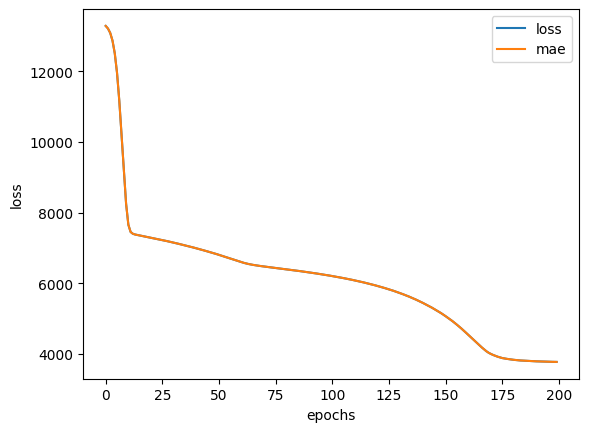

In [ ]:
#Plot the loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
#Increase the number of neurons
#set randon seed
tf.random.set_seed(42)
#2. Create model
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
]
)

#3.Compile the model
insurance_model_2.compile(
     loss=tf.keras.losses.mae,
     optimizer=tf.keras.optimizers.Adam(),
     metrics=["mae"]
 )

#4. Fit the model
history_1=insurance_model_2.fit(
    x_train,y_train,epochs=200
)


Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 13297.0898 - mae: 13297.0898
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13169.9854 - mae: 13169.9854
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12921.7012 - mae: 12921.7012
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12415.4678 - mae: 12415.4678
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11499.9141 - mae: 11499.9141
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10152.6367 - mae: 10152.6367
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8693.1367 - mae: 8693.1367
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7670.0791 - mae: 7670.0791
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7423.5498 - mae: 7423.5498
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7386.7534 - mae: 7386.7534
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7365.3286 - mae: 7365.3286
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━

Text(0.5, 0, 'epochs')

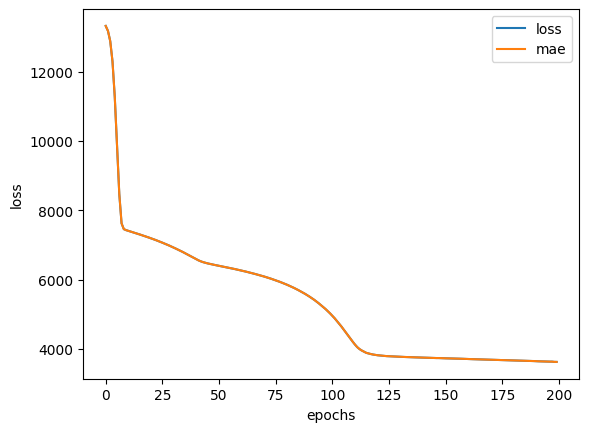

In [ ]:
#Let's plot and see how 100 ,10 ,1 do
pd.DataFrame(history_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Text(0.5, 0, 'epochs')

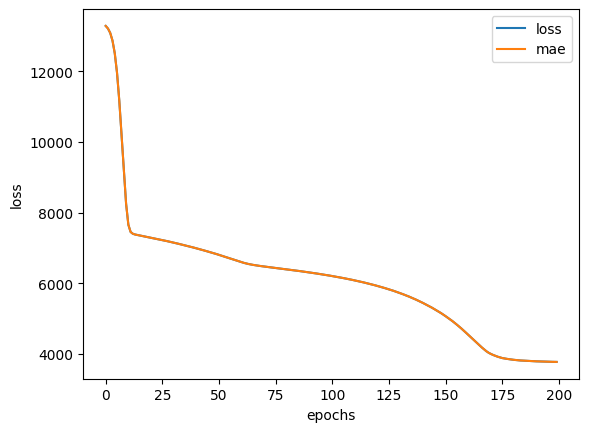

In [ ]:
#Previous history 64 ,32,1
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

Data preprocessing involves cleaning, transforming, and reducing data to make it suitable for analysis and modeling. Key methods include

* handling missing values through imputation, smoothing out noisy data,
* scaling numerical data through normalization.
* encoding categorical data
* reducing dimensions
* integrating data from multiple sources.

**Data cleaning**
1. **Handling missing values**: Filling in missing data points using the mean, median, or mode, or using more advanced imputation techniques.
2. **Removing outliers**: Identifying and either removing, or replacing, data points that are statistically inconsistent with the rest of the dataset.
3. **Smoothing noise**: Filtering out random errors in the data using methods like binning or regression.
4. *Removing duplicates*: Identifying and deleting redundant records.

**Data transformation**
1. **Normalization**:
```
most prefered by models
```
Scaling numerical data to a standard range, often between 0 and 1, to prevent features with large values from disproportionately influencing the model.
2. **Encoding**: Converting categorical features (like text labels) into a numerical format that algorithms can understand, using techniques such as one-hot encoding.
Aggregation: Combining data to create a more summarized view.
3. **Binarization**: Transforming data into binary values (0 or 1) based on a threshold, which can help with classification tasks.
Data reduction
4. **Dimensionality reduction**: Reducing the number of features or variables while retaining as much information as possible. This can improve model efficiency and performance.
5. **Feature selection**: Choosing the most relevant features for a specific task.
6. **Sampling**: Selecting a representative subset from a large dataset to work with.
Other techniques
6. **Data integration**: Merging data from multiple sources into a single, consistent dataset.
7. **Feature engineering**: Creating new features from existing data to improve model performance.
8. **Data augmentation**: Artificially increasing the size of a dataset by creating modified copies of existing data, often used in computer vision.

In [ ]:
#Preprocessing data with feature scaling
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
x['children']

NameError: name 'x' is not defined

In [ ]:
x["age"].plot()

NameError: name 'x' is not defined

In [ ]:
x["age"].plot(kind="hist")

NameError: name 'x' is not defined

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

#readd the insurance data frame
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
